In [1]:
# first let's import the datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.preprocessing import scale

In [2]:
# we will now be working on the dataset iris, which is already packaged in Sklearn
digits = datasets.load_digits()
# remember that digits is an embedded dataset within sklearn, so some of these functions won't apply to an external dataset
# .keys will show the different variables available within the dataset
# data is the available input, and target is the true value to be predicted
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
# scale is a function that will allow to scale the dataset
# more information can be found on the following link
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
data = scale(digits.data)

In [4]:
# the following instruction will return the shape of the dataset
n_samples, n_features = data.shape
print("number of rows:", n_samples)
print("number of features:", n_features)

# the following instruction will return the number of different values in the target feature
n_digits = len(np.unique(digits.target))

# n_digits will be used as the number of clusters 
print("number of different values for the target:", n_digits)

number of rows: 1797
number of features: 64
number of different values for the target: 10


In [5]:
# this will allow the create the KMeans Model
kmeans = cluster.KMeans(n_clusters=n_digits)

# Once created, now we can fit the model to the data
kmeans.fit(data)
print(kmeans.get_params())

{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [6]:
# now we can calculate the silhouette score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
print("Silhouette Coefficient:", metrics.silhouette_score(data, kmeans.labels_))

# We can also calculate the calinski_harabasz_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(data, kmeans.labels_))

Silhouette Coefficient: 0.1457662092846671
Calinski_harabasz Coefficient: 114.76795124266272


In [7]:
# Since we already have the true labels, we can also calculate the completeness and the homogeneity scores
print("Completeness score", metrics.completeness_score(digits.target, kmeans.labels_))
print("Homogeneity score", metrics.homogeneity_score(digits.target, kmeans.labels_))
# However, this might not be possible for other datasets when the true labels are not available
# Also, we need to make sure that the number of clusters is equal to the number of the unique values of the true target

Completeness score 0.6553628882368033
Homogeneity score 0.6082418289528086


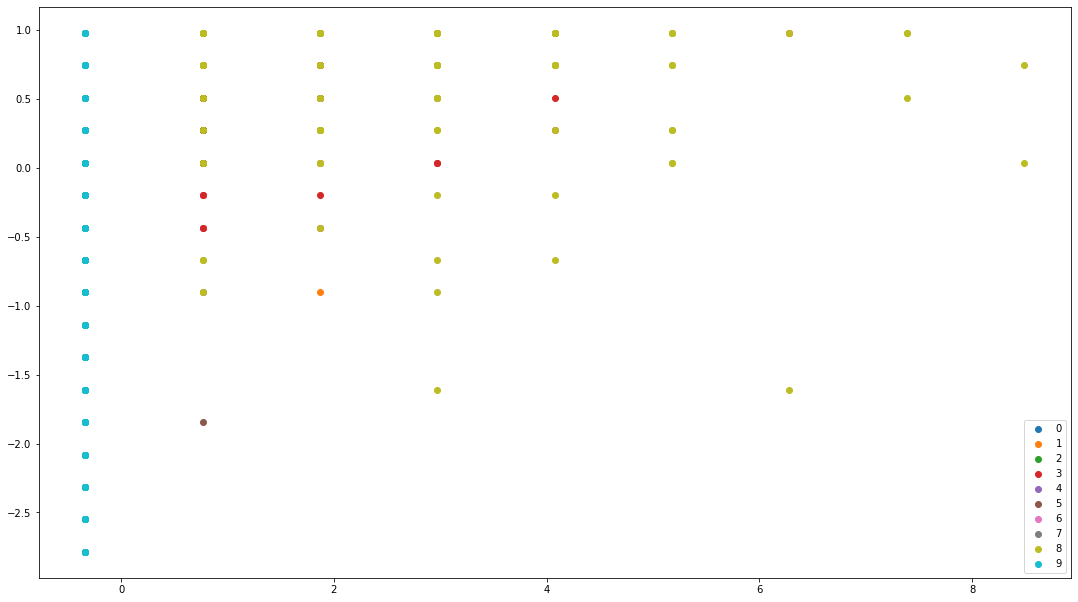

In [8]:
# We can also print the results of the algorithms on a 2D graph for a better understanding
# To do this, we need to select two features, either randomly or based on a specific analysis
# For this dataset, we have 64 features, so we are picking randomly the 2nd and the 4th features
# For another dataset, you will need to do an analysis and pick the right two features to be used
indexFeature1 = 1
indexFeature2 = 3
# Getting unique labels
labels = kmeans.labels_
#labels = digits.target
u_labels = np.unique(labels)
#plotting the results
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

# for each label in u_labels
for i in u_labels:
    # print the values for this label on a scatter plot
    plt.scatter(data[labels == i , indexFeature1] , data[labels == i , indexFeature2] , label = i)
plt.legend()
plt.show()

# However note that this graph might not be very useful as the analysis was done on all features and not on these two features

In [9]:
# Another solution is to use PCA to reduce the number of features to 2
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# first we import the library
from sklearn.decomposition import PCA

# Transform the data 
pca = PCA(2) # create an empty PCA with 2 features
data2F = pca.fit_transform(data) # then apply PCA to the dataset data

print(data.shape)
print(data2F.shape)

(1797, 64)
(1797, 2)


In [10]:
# again this will allow the create the KMeans Model
kmeans2F = cluster.KMeans(n_clusters=n_digits)

# Once created, now we can fit the model to the data
# remember that the new dataset is now called data2F
kmeans2F.fit(data2F)
print(kmeans.get_params())

{'algorithm': 'auto', 'copy_x': True, 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 10, 'n_init': 10, 'n_jobs': 'deprecated', 'precompute_distances': 'deprecated', 'random_state': None, 'tol': 0.0001, 'verbose': 0}


In [11]:
# again we can calculate the silhouette score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
print("Silhouette Coefficient:", metrics.silhouette_score(data2F, kmeans2F.labels_))

# We can also calculate the calinski_harabasz_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html
print("Calinski_harabasz Coefficient:", metrics.calinski_harabasz_score(data2F, kmeans2F.labels_))

Silhouette Coefficient: 0.37686853481351695
Calinski_harabasz Coefficient: 1470.7242797547372


In [12]:
# Since we already have the true labels, we can also calculate the completeness and the homogeneity scores
print("Completeness score", metrics.completeness_score(digits.target, kmeans2F.labels_))
print("Homogeneity score", metrics.homogeneity_score(digits.target, kmeans2F.labels_))
# However, this might not be possible for other datasets when the true labels are not available
# Also, we need to make sure that the number of clusters is equal to the number of the unique values of the true target

Completeness score 0.4704522090864725
Homogeneity score 0.45814428654010086


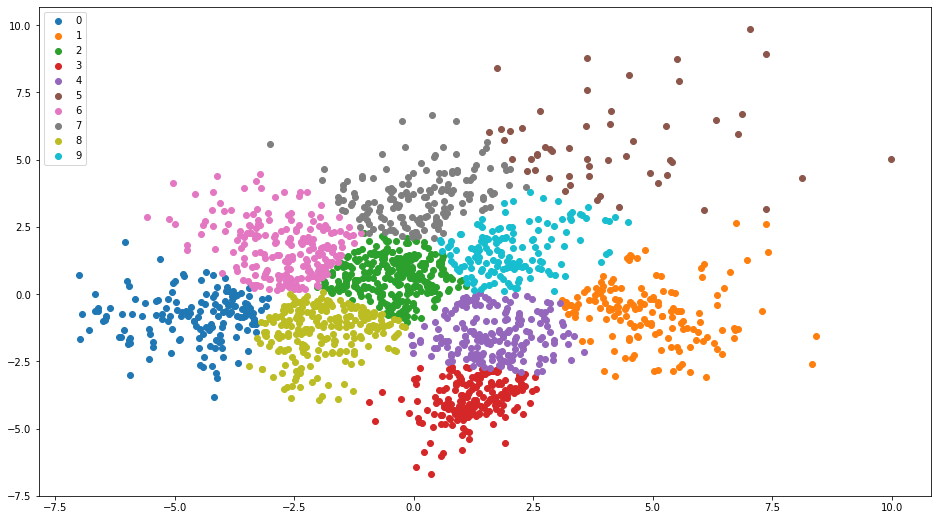

In [13]:
# now we don't need to reduce the number of features as we only have two features
indexFeature1 = 0
indexFeature2 = 1
# Getting unique labels
labels = kmeans2F.labels_
#labels = digits.target
u_labels = np.unique(labels)
#plotting the results
fig = plt.gcf()
fig.set_size_inches(16, 9)

# for each label in u_labels
for i in u_labels:
    # print the values for this label on a scatter plot
    plt.scatter(data2F[labels == i , indexFeature1] , data2F[labels == i , indexFeature2] , label = i)
plt.legend()
plt.show()

# now the graph looks better as the analysis was done on the two features used to display the results